In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Titanic dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

### Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.drop(["Name", "Ticket", "Cabin", "Embarked"], axis=1, inplace=True)

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [8]:
df.Age.fillna(df.Age.median(), inplace=True)

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [10]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


<AxesSubplot:>

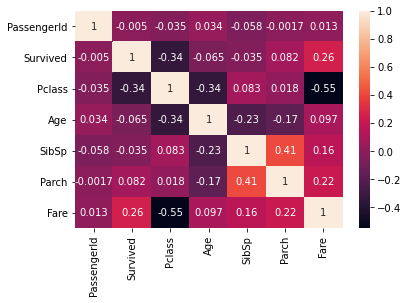

In [11]:
sns.heatmap(df.corr(), annot=True)

From the figure we can observe that Pclass, Parch, Fare, SibSp and Survived having highest correlation values compared to others.

### Visualisation

<AxesSubplot:xlabel='Survived', ylabel='count'>

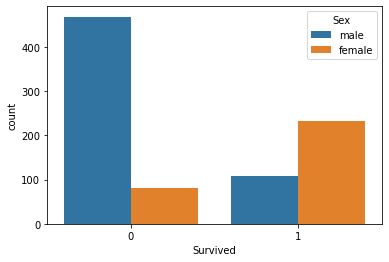

In [12]:
sns.countplot(x="Survived", hue="Sex", data=df)

Most of the Males are not Survived.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

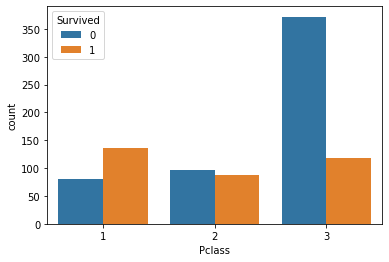

In [13]:
sns.countplot(x='Pclass', hue='Survived', data=df)

The people in Class-3 are having less chance of Surviving.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

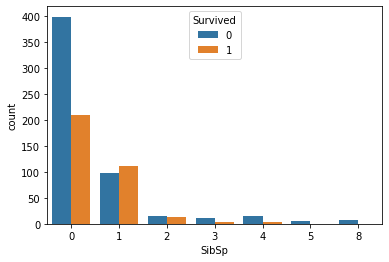

In [14]:
sns.countplot(x="SibSp",hue="Survived", data=df)

The people who are not having any SibSp will have less chance of Surviving.

<AxesSubplot:xlabel='Parch', ylabel='count'>

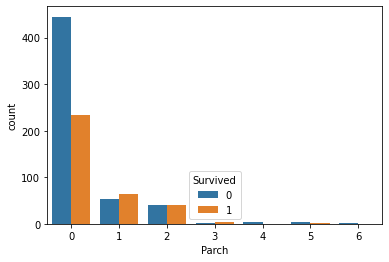

In [15]:
sns.countplot(x='Parch', hue='Survived' , data=df)

<AxesSubplot:xlabel='Age', ylabel='Density'>

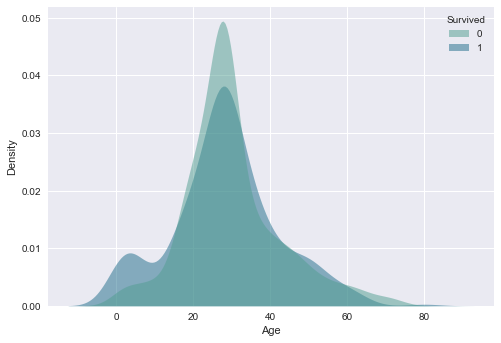

In [16]:
plt.style.use('seaborn')
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0)

<AxesSubplot:xlabel='Age', ylabel='Density'>

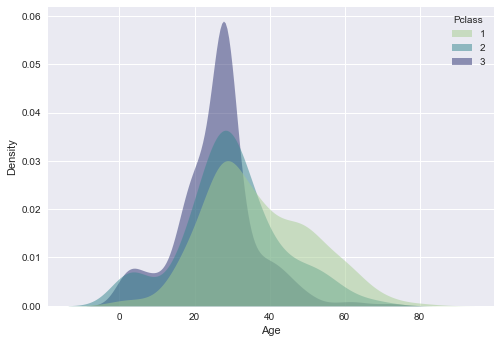

In [17]:
sns.kdeplot(data=df, x='Age', hue='Pclass', fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0)

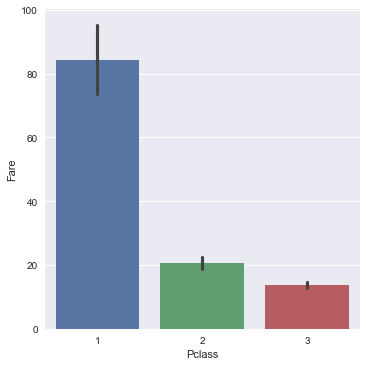

In [18]:
sns.catplot(x='Pclass', y='Fare', data=df, kind='bar')

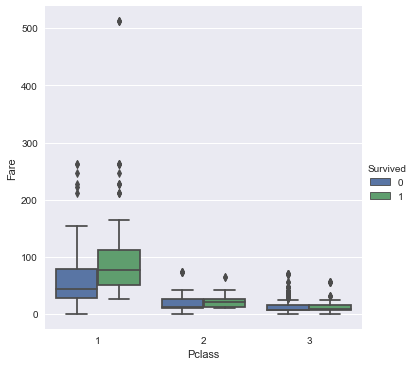

In [19]:
sns.catplot(x='Pclass', y='Fare', hue='Survived', data=df, kind='box')

### ML Algorithms

In [20]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [21]:
df.Sex = encode.fit_transform(df.Sex)

In [22]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [23]:
x = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

In [26]:
print(len(x_train))
print(len(x_test))

712
179


### DecisionTree

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [28]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [29]:
model1 = dtc.score(x_test, y_test)
model1

0.7988826815642458

### RandomForestClassifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)

In [31]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [32]:
model2 = rfc.score(x_test, y_test)
model2

0.8212290502793296

### NaiveBayes

In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [34]:
gnb.fit(x_train, y_train)

GaussianNB()

In [35]:
model3 = gnb.score(x_test, y_test)
model3

0.7932960893854749

### LogisticRegression

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=200)

In [37]:
lr.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [38]:
model4 = lr.score(x_test, y_test)
model4

0.8100558659217877

### KNeighborsClassifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=29)

In [40]:
knc.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=29)

In [41]:
model5 = knc.score(x_test, y_test)
model5

0.7374301675977654

### SupportVectorClassifier

In [42]:
from sklearn.svm import SVC
svc = SVC()

In [43]:
svc.fit(x_train, y_train)

SVC()

In [44]:
model6 = svc.score(x_test, y_test)
model6

0.7206703910614525

### Conclusion

In [45]:
models = pd.DataFrame({
    'Model':['DecisionTreeClassifier', 'RandomForestClassifier', 'GaussianNB', 'LogisticRegression', 
             'KNeighborsClassifier', 'SupportVectorClassifier'],
    'Score':[round(model1*100, 2), round(model2*100, 2), round(model3*100, 2), round(model4*100, 2), 
             round(model5*100, 2), round(model6*100, 2)]
}).sort_values(by='Score', ascending=False)

In [46]:
models['Score'] = models.Score.apply(lambda x: str(x)+'%')

In [47]:
models

,Model,Score
1,RandomForestClassifier,82.12%
3,LogisticRegression,81.01%
0,DecisionTreeClassifier,79.89%
2,GaussianNB,79.33%
4,KNeighborsClassifier,73.74%
5,SupportVectorClassifier,72.07%


RandomForestClassifier is the best model for this Dataset

In [48]:
from sklearn.metrics import confusion_matrix
c_mat = confusion_matrix(y_test, rfc.predict(x_test))
c_mat

array([[99, 11],
       [21, 48]], dtype=int64)

Text(52.0, 0.5, 'Predicted Value')

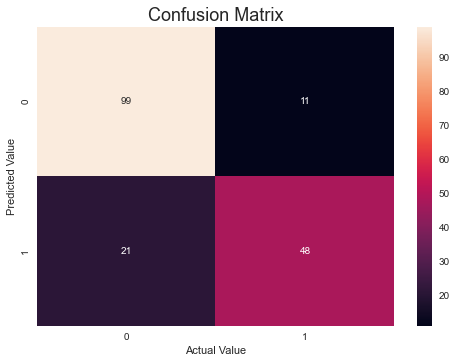

In [49]:
sns.heatmap(c_mat, annot=True, fmt='g')
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')